In [3]:
from algorithm_ranking import MeasurementsVisualizer, MeasurementsManager, RankVariantsSort2
from am4pa.linnea import LinneaConfig, MeasurementsLinnea

In [16]:
linnea_config = LinneaConfig("MatrixChain4",4)
linnea_config.set_local_directory("../linnea/matrix-chain-4/")
linnea_config.setup_backend_details(server="login18-1.hpc.itc.rwth-aachen.de",
                                   uname = "as641651",
                                   init_script="~/.analyzer",
                                   backend_dir="~/PhD/va4algs-exps/matrix-chain-4/")


In [17]:
linnea_config.connect_backend()

In [18]:
linnea_config.check_backend_folder_sync()

True

In [19]:
op_sizes = ["1000","1000","1000","1000","1000"]
ms = MeasurementsLinnea(linnea_config,op_sizes)

In [20]:
ms.generate_variants()

source ~/.analyzer; cd ~/PhD/va4algs-exps/matrix-chain-4; python generate-variants-linnea.py 1000 1000 1000 1000 1000 --threads=4
['New solution:................6e+09\n', 'No further generation steps possible.\n', '----------------------------------\n', 'Number of nodes:                 8\n', 'Solution nodes:                  1\n', 'Data:                        5e+06\n', 'Best solution:               6e+09\n', 'Intensity:                 1.2e+03\n', 'Number of algorithms:            6\n', 'Generated Variants.\n']
Success: Backend interactive run: Generate variants


In [21]:
ms.gather_competing_variants()

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/matrix-chain-4/experiments/1000_1000_1000_1000_1000/case_table.csv ../linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000
b''


['algorithm0',
 'algorithm2',
 'algorithm4',
 'algorithm1',
 'algorithm5',
 'algorithm3']

In [22]:
ms.measure(30,1,bSlrum=True)

source ~/.analyzer; cd ~/PhD/va4algs-exps/matrix-chain-4/experiments/1000_1000_1000_1000_1000; python generate-measurements-script.py --algs algorithm0 algorithm2 algorithm4 algorithm1 algorithm5 algorithm3 --rep 30 --threads 4 --id 1
[]
Success: Backend interactive run: Generate Measurement script 1
Running Measurements Backend batch
source ~/.analyzer; cd ~/PhD/va4algs-exps/matrix-chain-4/experiments/1000_1000_1000_1000_1000; sbatch submit.sh julia 'runner_competing_1.jl '
['Submitted batch job 31421861\n']
Success: Backend batch run: Measurements from runner_competing_1.jl


In [25]:
linnea_config.bm.check_slrum_status(ms.runner.job_name)

['             JOBID PARTITION                           NAME     USER    STATE       TIME TIME_LIMI  NODES NODELIST(REASON)\n']


0

In [26]:
ms.collect_measurements(1)

scp as641651@login18-1.hpc.itc.rwth-aachen.de:~/PhD/va4algs-exps/matrix-chain-4/experiments/1000_1000_1000_1000_1000/run_times_competing_1.csv ../linnea/matrix-chain-4/cluster-data/1000_1000_1000_1000_1000
b''


In [28]:
#ms.get_alg_measurements()

In [31]:
ms.h0.sort()

In [32]:
ms.h0

['algorithm0',
 'algorithm1',
 'algorithm2',
 'algorithm3',
 'algorithm4',
 'algorithm5']

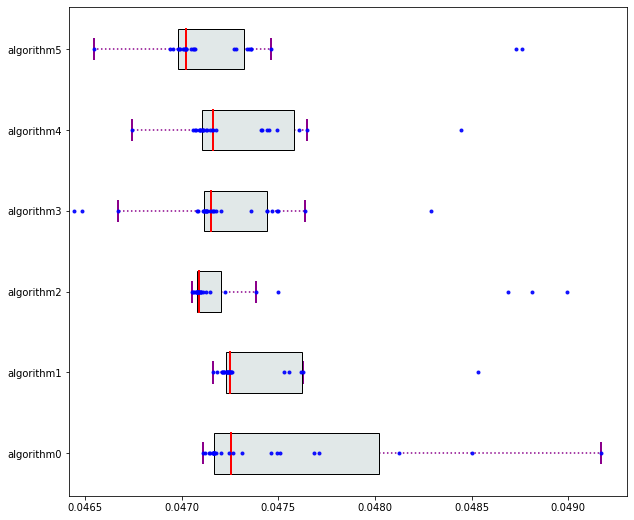

In [37]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), ms.h0)
fig = mv.show_measurements_boxplots()

In [38]:
rv = RankVariantsSort2(ms.get_alg_measurements(), ms.h0)

In [39]:
rv.rank_variants(debug=True)

['algorithm0', 'algorithm1', 'algorithm2', 'algorithm3', 'algorithm4', 'algorithm5']
[0 1 2 3 4 5]


compare algorithm0 and algorithm1
['algorithm0', 'algorithm1', 'algorithm2', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 2 3 4]


compare algorithm2 and algorithm1
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 2 3 4]


compare algorithm1 and algorithm3
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 1 2 3]


compare algorithm3 and algorithm4
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 1 1 2]


compare algorithm4 and algorithm5
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 1 1 1]


compare algorithm0 and algorithm2
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3', 'algorithm4', 'algorithm5']
[0 0 1 1 1 1]


compare algorithm2 and algorithm1
['algorithm0', 'algorithm2', 'algorithm1', 'algorithm3'

,case:concept:name,case:rank:q75-q25
0,algorithm0,0
1,algorithm2,0
2,algorithm1,1
3,algorithm3,1
4,algorithm4,1
5,algorithm5,1
